# Topic: Tensorflow 2.0 Data Pipeline creation for a binary classification model

# Learning Objectives:
The objectives that we want to establish in this lesson are:


1. Why are we learning about data loading?
3. Applying data loading with the Fire Detection Image Dataset
4. Takeaways/Conclusions
5. References

# Why are we learning about data loading?

In this notebook, we’re going to explore the tensorflow data pipeline, tool built into TensorFlow that provides the flexibility needed to build highly-optimized data pipelines.

We’ll also discuss the efficiency of the tensorflow data pipeline and whether or not we should use tf.data. We’ll then configure our development environment, review our project directory structure, and discuss the image dataset that we’ll be working with in this project.

From there we can implement our Python scripts, including methods for organizing our dataset in multiple folders, initializing our data pipeline, and then finally training a CNN using the pipeline as our custom data generator.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import os.path
from os import path
import glob
import collections
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from PIL import Image
from tensorflow.keras.preprocessing import image

from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from matplotlib import rcParams

np.random.seed(2016) 

### Loading 'Fire Detection Image Dataset' from Github

In [ ]:
if path.exists('/content/gdrive/My Drive/Fire_BinaryClassifier') == False:
  os.mkdir('/content/gdrive/My Drive/Fire_BinaryClassifier')

os.chdir('/content/gdrive/My Drive/Fire_BinaryClassifier/')

if path.exists('/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset') == False:
 !git clone https://github.com/cair/Fire-Detection-Image-Dataset.git

Cloning into 'Fire-Detection-Image-Dataset'...
remote: Enumerating objects: 673, done.
remote: Total 673 (delta 0), reused 0 (delta 0), pack-reused 673
Receiving objects: 100% (673/673), 307.49 MiB | 22.64 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
os.getcwd()
data_path = '/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/'

In [ ]:
!unrar x "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Fire images.rar" "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/"

In [ ]:
!unrar x "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Normal Images 1.rar" "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/"
!unrar x "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Normal Images 2.rar" "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/"
!unrar x "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Normal Images 3.rar" "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/"
!unrar x "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Normal Images 4.rar" "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/"
!unrar x "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Normal Images 5.rar" "/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/"

### Creating a dataframe that will store all the images

In [ ]:
fire_files = glob.glob(data_path+"Fire images/*.*")
normal_files1 = glob.glob(data_path+"Normal Images 1/*.*")
normal_files2 = glob.glob(data_path+"Normal Images 2/*.*")
normal_files3 = glob.glob(data_path+"Normal Images 3/*.*")
normal_files4 = glob.glob(data_path+"Normal Images 4/*.*")
normal_files5 = glob.glob(data_path+"Normal Images 5/*.*")

normal_files1 = normal_files1 + normal_files2 + normal_files3 + normal_files4 + normal_files5

In [ ]:
#creating a new dataframe(df_fire) that consists of fire images only.
ls_fire = []
for i in fire_files:
    ls_fire.append(['Fire images', i.split("/")[7], '1'])

df_fire = pd.DataFrame(ls_fire, columns=['folder', 'filename', 'label'])

print('Shape of df_fire is: ', df_fire.shape)

#checking the length of fire dataframe.
print('Length of fire dataframe:', len(df_fire))

#checking for the duplicates in the fire dataframe.
print('Number of duplicates in fire dataframe:', df_fire['filename'].duplicated().sum())
df_fire.head()

Shape of df_fire is:  (110, 3)
Length of fire dataframe: 110
Number of duplicates in fire dataframe: 0


,folder,filename,label
0,Fire images,your-room1.jpg,1
1,Fire images,hqdefault.jpg,1
2,Fire images,pic1.jpg,1
3,Fire images,dsc_01001.jpg,1
4,Fire images,dormfire_1.jpg,1


In [ ]:
#creating a new dataframe(df_normal) that consists of normal images only.
ls_normal = []

for i in normal_files1:
    ls_normal.append([i.split("/")[6], i.split("/")[7], '0'])

df_normal = pd.DataFrame(ls_normal, columns=['folder', 'filename', 'label'])

print('Shape of df_normal is: ', df_normal.shape)

#checking the length of fire dataframe.
print('Length of normal images dataframe:', len(df_normal))

#checking for the duplicates in the fire dataframe.
print('Number of duplicates in normal images dataframe:', df_normal['filename'].duplicated().sum())

df_normal.head()

Shape of df_normal is:  (541, 3)
Length of normal images dataframe: 541
Number of duplicates in normal images dataframe: 0


,folder,filename,label
0,Normal Images 1,9544.jpg,0
1,Normal Images 1,Amanda Aitken Article Image 2.jpg,0
2,Normal Images 1,20150930-Einzelzimmer.jpg,0
3,Normal Images 1,906a126cd675836e17f24837ff7ade1b.jpg,0
4,Normal Images 1,7875419_4_z.jpg,0


### Creating a final dataframe by combining fire and non fire images

In [ ]:
frames = [df_fire, df_normal]
final_df = pd.concat(frames)
#Shuffle the combined training data
final_df = shuffle(final_df)
final_df.head(20)

,folder,filename,label
155,Normal Images 1,952111662014LEUDLAV.jpg.png,0
101,Normal Images 1,a62fdb68649fa65f41872c01a058bd58.jpg,0
169,Normal Images 2,bce8306b7c28fd808d52e831260b194b.jpg,0
362,Normal Images 3,iStock_000020716385Large-1024x683.jpg,0
120,Normal Images 1,98314964.jpg,0
89,Normal Images 1,5.jpg,0
30,Normal Images 1,5983c29594905fdd0be9d691c036c90b0603f68d.jpg,0
310,Normal Images 3,llanelli-fire-red-room.jpg,0
171,Normal Images 2,contemporary-family-room.jpg,0
345,Normal Images 3,leshan_china_buddha.jpg,0


In [ ]:
#checking for any null/nans values
final_df.isna().sum()

folder      0
filename    0
label       0
dtype: int64

In [ ]:
# saving the dataframe
final_df.to_csv(data_path+'final_df.csv', index=False)

### Visualize the countplot of the label distribution.
  * Label '0' : Non-fire image
  * Label '1' : Fire image

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])
fig.add_trace(go.Bar(x =final_df['label'].value_counts().index,y=final_df['label'].value_counts().to_numpy(),marker_color=['lightblue','coral'],showlegend=False),row=1,col=1)

rcParams['figure.figsize'] = 10 ,8
fig.add_trace(go.Pie(
     values=final_df['label'].value_counts().to_numpy(),
     labels=final_df['label'].value_counts().index,
    marker=dict(colors=['lightblue','coral'])),
    row=1, col=2)

### Creating training and testing samples from the above created final dataframe


1. Split the data into train and test using sklearns 'train_test_split'
2. Shuffle the dataframe
3. Perform stratified random sampling such that the proportion of labels in in each training and testing sample matches with the porportion of labels in the original dataframe. 

In [ ]:
df_train,df_test = train_test_split(final_df,train_size=0.70,random_state=42,shuffle=True, stratify = final_df['label'])

print('Size of training data:', df_train.shape)
print('Size of testing data:', df_test.shape)

#training samples
print('\nTEST label counts:')
print(df_test['label'].value_counts())
print('\nTRAIN label counts:')
print(df_train['label'].value_counts())

Size of training data: (455, 3)
Size of testing data: (196, 3)

TEST label counts:
0    163
1     33
Name: label, dtype: int64

TRAIN label counts:
0    378
1     77
Name: label, dtype: int64


### Creating a custom data generator function: 

This will create the batch of images(converted into numpy array) to be ready to fed into the convolutional neural network. This generator method helps in reading the images on the go when they will be used for training. Since we are reading the images on the go, we are actually saving memory and even a system with 8GB RAM can be used for a 100GB dataset.

### *Normal function vs Generator function*     
Assume a scenario where you and your friend went ot a restaurant and order food(refer to below image).

So server 1 takes your order and brings the entire order to your table at once.
As a result, it will take up a lot of table space and make it difficult to eat. And this is how a normal Python function works: you pass some input to it, call it, and it returns everything all at once.

Consider server 2, to whom you ordered the same food, but she brought it to you one by one, beginning with appetizers, then main course, and finally dessert. Your table space will be free, and you will receive everything in order. This is a generator function where you call it and it returns the values one by one in the order specified by the user.

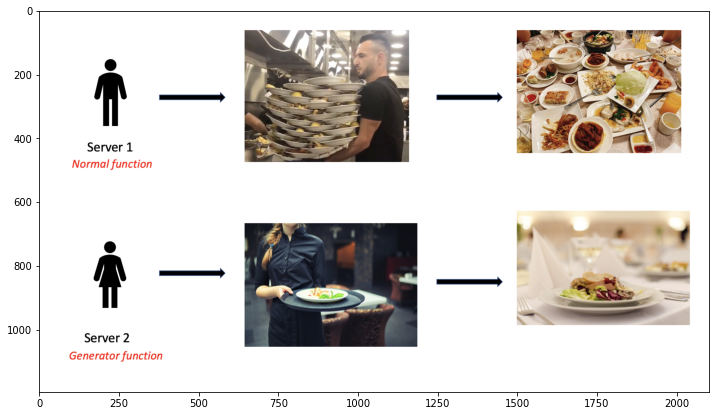

In [ ]:
rcParams['figure.figsize'] = 12 ,8
img_A = mpimg.imread('/content/gdrive/My Drive/Fire_BinaryClassifier/Print/example.png')
plt.imshow(img_A)

### Understanding image basics and how they can be converted into numpy arrays/tensors. 

Images can only be processed in the machine learning and deep learning models as numpy arrays, and in the context of deep learning, those NumPy arrays are technically referred to as tensors.

The dimensions of these NumPy arrays are determined by the following factors.
- Image size — Two dimensions are always required to represent the image's height and width.
- Color channel
- Number of images (batch of images)



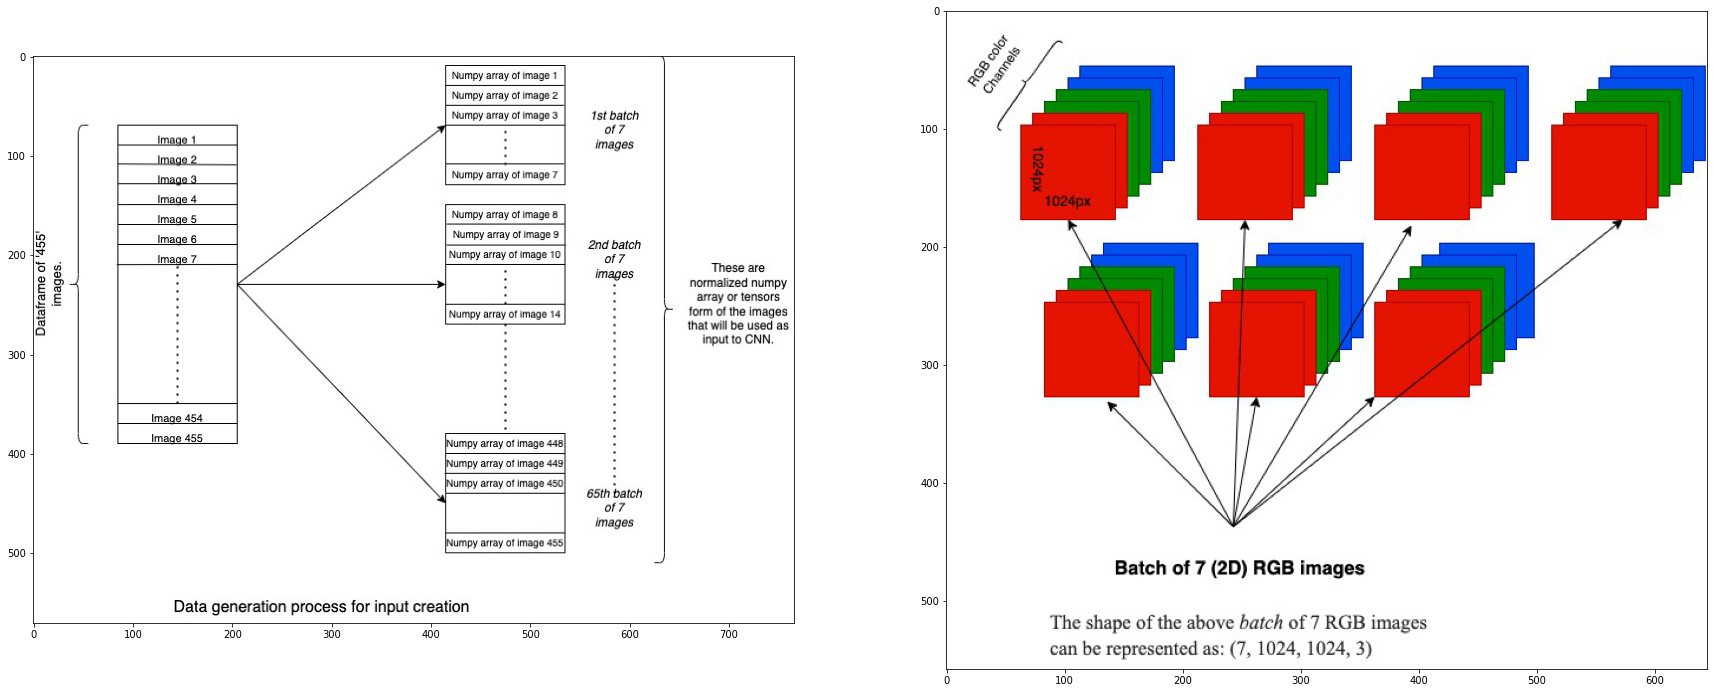

In [ ]:
rcParams['figure.figsize'] = 30 ,25

# read images
img_A = mpimg.imread('/content/gdrive/My Drive/Fire_BinaryClassifier/Print/2.jpg')
img_B = mpimg.imread('/content/gdrive/My Drive/Fire_BinaryClassifier/Print/1.jpg')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)


In the above diagram:
- We divided the original datafrme into 65 batches
- The image on the left depicts each batch, which contains 7 RGB images, and how it is represented using a four-dimensional (4D) NumPy array or a tensor.

#### Workflow of custom data generator that we have created for this project.

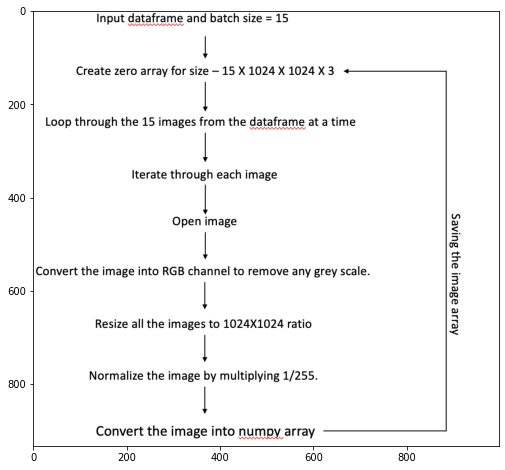

In [ ]:
from IPython.display import Image

rcParams['figure.figsize'] = 15 ,8
img_A = mpimg.imread('/content/gdrive/My Drive/Fire_BinaryClassifier/Print/data_gen.png')
plt.imshow(img_A)

In [ ]:
def data_gen(df, batch_size):   
    while True:
        x_batch = np.zeros((batch_size, 1024, 1024, 3))
        y_batch = np.zeros((batch_size, 1))

        for j in range(len(df)//batch_size):
            a = 0

            for m, k, p in zip(df['filename'].values[j*batch_size:(j+1)*batch_size], df['label'].values[j*batch_size:(j+1)*batch_size], df['folder'].values[j*batch_size:(j+1)*batch_size]):
                #print('a', a)
                img = Image.open('{}{}/{}'.format(data_path, p, m))

                #to remove extra alpha channel in some of the images.
                img = img.convert("RGB") 

                #resize all images to standard 1024X1024 size
                image_red = img.resize((1024, 1024))

                #converting the image to numpy array
                x_batch[a] = image.img_to_array(image_red)/255.0
                y_batch[a] = k
                a += 1
            yield (x_batch, y_batch)

In [ ]:
def val_data_gen(df, batch_size):  
    x_batch = np.zeros((batch_size, 1024, 1024, 3))
    y_batch = np.zeros((batch_size, 1))

    for j in range(len(df)//batch_size):
        a = 0

        for m, k, p in zip(df['filename'].values[j*batch_size:(j+1)*batch_size], df['label'].values[j*batch_size:(j+1)*batch_size], df['folder'].values[j*batch_size:(j+1)*batch_size]):
            #print('a', a)
            img = Image.open('{}{}/{}'.format(data_path, p, m))

            #to remove extra alpha channel in some of the images.
            img = img.convert("RGB") 

            #resize all images to standard 1024X1024 size
            image_red = img.resize((1024, 1024))

            #converting the image to numpy array
            x_batch[a] = image.img_to_array(image_red)/255.0
            y_batch[a] = k
            a += 1
        yield (x_batch)

In [ ]:
# Function that take the number of epochs and history of the model as input and print the loss and accuracy graph.

def loss_aacc(epoch, history):
    
    x1 = range(1, len(history.history['loss'])+1)
    x2 = range(1, len(history.history['loss'])+1)
    y1 = history.history['loss']
    y2 = history.history['val_loss']

    z1 = history.history['binary_accuracy']
    z2 = history.history['val_binary_accuracy']

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
    axes[0].plot(x1, y1, label = 'train', color='blue')
    axes[0].plot(x2, y2, label = 'test',  color='green')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(x1, z1, label = 'train', color='blue')
    axes[1].plot(x2, z2, label = 'test', color='green')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    fig.tight_layout()

In [ ]:
#intialize the result dictionary which will hold evaluation result od each step.
results = collections.defaultdict(dict)

In [ ]:

def model_evaluation(y_pred, key_val):
    
    y_pred_bool = y_pred.astype(int)
    y_true = df_test.label.values.astype(int).reshape(-1,1)

    accuracy = accuracy_score(y_true, y_pred_bool)
    # precision tp / (tp + fp)
    precision = precision_score(y_true, y_pred_bool)
    # recall: tp / (tp + fn)
    recall = recall_score(y_true, y_pred_bool)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_true, y_pred_bool)

    print('Accuracy  | %2f' % accuracy)
    print('Precision | %2f' % precision)
    print('Recall    | %2f' % recall)
    print('F1 score  | %2f' % f1)

    cf_matrix = confusion_matrix(y_true, y_pred_bool)
    print('\nConfusion Matrix')
    print(cf_matrix)

    results[key_val]['Accuracy'] = accuracy
    results[key_val]['Precision'] = precision
    results[key_val]['Recall'] = recall
    results[key_val]['F1 Score'] = f1
    results[key_val]['CM'] = cf_matrix


    #Print confusion matrix heatmap
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['Non-Fire','Fire'])
    ax.yaxis.set_ticklabels(['Non-Fire','Fire'])
    plt.show()


In [ ]:
# Function takes predicted values (after model.predict) and the state of the model as text and 
# prints the evaluation metrics: Accuracy, Precision, Recall, F1 and Confusion Matrix

def eval(y_pred, key_val):

    #y_pred_bool = y_pred.astype(int)
    y_true = df_test.label.values.astype(int).reshape(-1,1)

    m = tf.keras.metrics.BinaryAccuracy()
    m.update_state(y_true, y_pred)
    acc = m.result().numpy()

    m = tf.keras.metrics.FalseNegatives()
    m.update_state(y_true, y_pred)
    FN = m.result().numpy()
    m = tf.keras.metrics.FalsePositives()
    m.update_state(y_true, y_pred)
    FP = m.result().numpy()
    m = tf.keras.metrics.TrueNegatives()
    m.update_state(y_true, y_pred)
    TN = m.result().numpy()
    m = tf.keras.metrics.TruePositives()
    m.update_state(y_true, y_pred)
    TP = m.result().numpy()
    
    m = tf.keras.metrics.Precision()
    m.update_state(y_true, y_pred) 
    Precision = m.result().numpy()
    
    m = tf.keras.metrics.Recall()
    m.update_state(y_true, y_pred)
    Recall = m.result().numpy()
    
    f1 = 2 * Precision * Recall / (Precision + Recall)

    cm = np.zeros((2,2))
    cm[0][0] = TN
    cm[0][1] = FP
    cm[1][0] = FN
    cm[1][1] = TP
    
    print('Accuracy  | ',round(acc,3))
    print('Precision | ',round(float(Precision),3))
    print('Recall    | ',round(float(Recall),3))
    print('F1 score  | ',round(float(f1), 3))

    print('\nConfusion Matrix')
    print(cm)

    results[key_val]['Accuracy'] = round(acc, 3)
    results[key_val]['Precision'] = round(float(Precision),3)
    results[key_val]['Recall'] = round(float(Recall), 3)
    results[key_val]['F1 Score'] = round(float(f1), 3)
    results[key_val]['CM'] = cm


    #Print confusion matrix heatmap
    ax = sns.heatmap(cm, annot=True, cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['Non-Fire','Fire'])
    ax.yaxis.set_ticklabels(['Non-Fire','Fire'])
    plt.show()

### Create a Convolutional Neural Network.

In [ ]:
# Initialize the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(1024, 1024, 3), use_bias=True),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu', use_bias=True),
        tf.keras.layers.MaxPooling2D((2, 2)),
     
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', use_bias=True),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Dropout(0.3),
     
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', use_bias=True),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)
        
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 1022, 1022, 32)    896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 511, 511, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 509, 509, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 254, 254, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 126, 126, 64)    

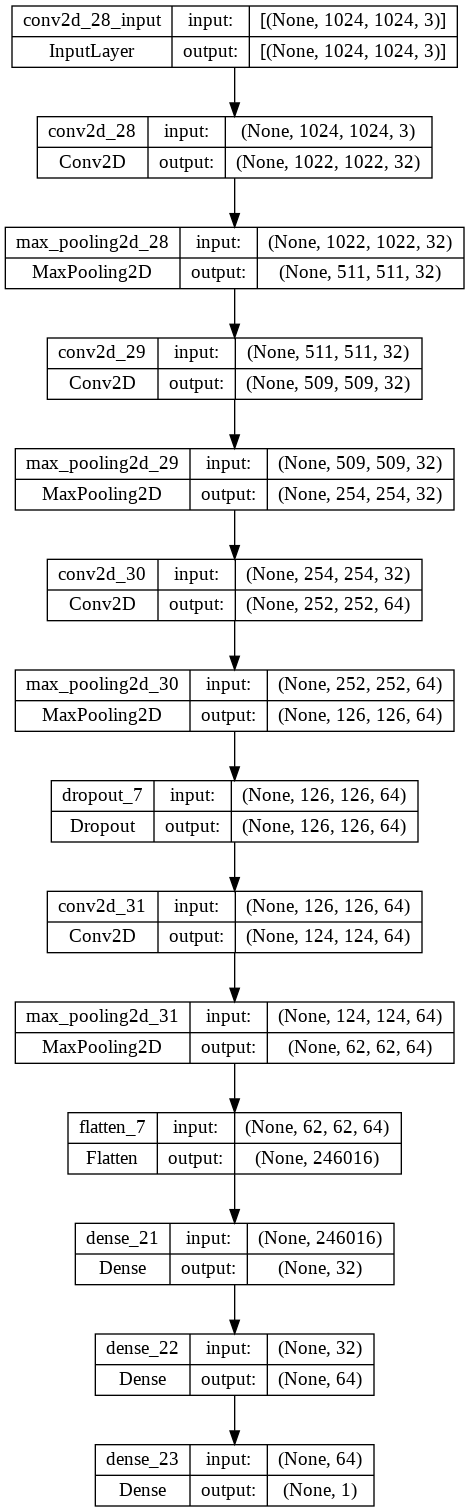

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="CNN+MLP model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

### Model compilation

Optimizer used is Adam with learning rate = 0.00001

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

#initial_weight_values
initial_weight_values = model.get_weights() 


### Old way of using data pipeline

- Fit the model using 'fit_generator'

In [ ]:
batch = 7
epoch = 10
history = model.fit_generator(generator=data_gen(df_train, batch_size=batch), 
                              steps_per_epoch=len(df_train) // batch, epochs=epoch, 
                              validation_data= data_gen(df_test, batch_size=batch), 
                              validation_steps= len(df_test) // batch)

Epoch 1/10
65/65 [==============================] - 40s 609ms/step - loss: 0.4274 - binary_accuracy: 0.8308 - val_loss: 0.4378 - val_binary_accuracy: 0.8316
Epoch 2/10
65/65 [==============================] - 39s 600ms/step - loss: 0.3868 - binary_accuracy: 0.8308 - val_loss: 0.4264 - val_binary_accuracy: 0.8316
Epoch 3/10
65/65 [==============================] - 38s 596ms/step - loss: 0.3681 - binary_accuracy: 0.8308 - val_loss: 0.4158 - val_binary_accuracy: 0.8316
Epoch 4/10
65/65 [==============================] - 47s 726ms/step - loss: 0.3539 - binary_accuracy: 0.8308 - val_loss: 0.4044 - val_binary_accuracy: 0.8418
Epoch 5/10
65/65 [==============================] - 48s 751ms/step - loss: 0.3389 - binary_accuracy: 0.8549 - val_loss: 0.3957 - val_binary_accuracy: 0.8776
Epoch 6/10
65/65 [==============================] - 47s 728ms/step - loss: 0.3271 - binary_accuracy: 0.8725 - val_loss: 0.3905 - val_binary_accuracy: 0.8776
Epoch 7/10
65/65 [==============================] - 50s 77

#### Lets visualize the training vs test loss and accuracy plot.

- Loss is decreasing and accuracy is increasing.

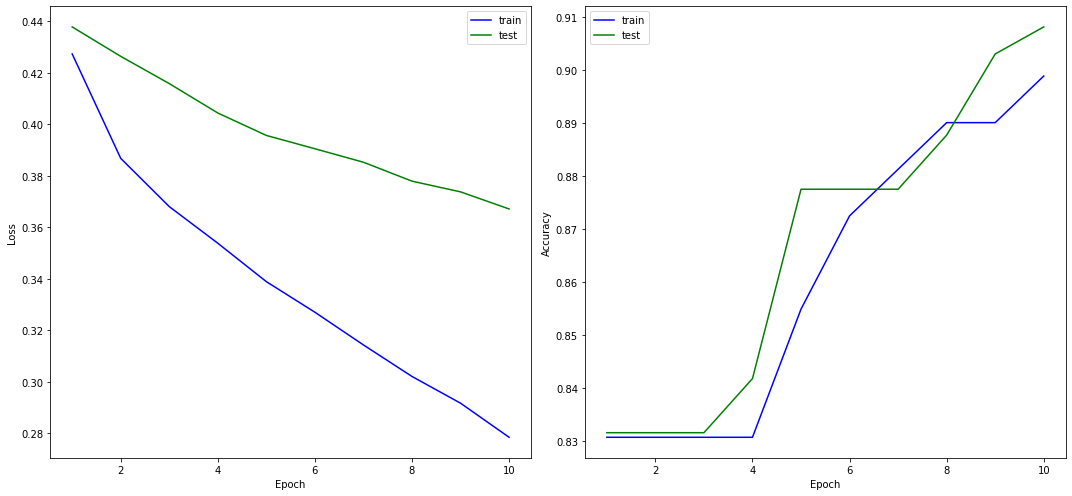

In [ ]:
loss_aacc(len(history.history['binary_accuracy']), history)

### New way of using data pipeline in Tensorflow 2.x

- Fit the model using 'fit'

In [ ]:
batch = 7
epoch = 10
#initializing the model weights
model.set_weights(initial_weight_values)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

data = tf.data.Dataset.from_generator(lambda: data_gen(df = df_train, batch_size = batch), 
                                              output_types = (tf.float32, tf.float32))

history1 = model.fit(data , steps_per_epoch=len(df_train) // batch, epochs=epoch, 
                     validation_data= data_gen(df_test, batch_size=batch), 
                     validation_steps= len(df_test) // batch,
                     callbacks=[callback])

Epoch 1/10
65/65 [==============================] - 49s 728ms/step - loss: 0.4604 - binary_accuracy: 0.8220 - val_loss: 0.4487 - val_binary_accuracy: 0.8316
Epoch 2/10
65/65 [==============================] - 55s 853ms/step - loss: 0.4134 - binary_accuracy: 0.8308 - val_loss: 0.4362 - val_binary_accuracy: 0.8316
Epoch 3/10
65/65 [==============================] - 56s 872ms/step - loss: 0.3902 - binary_accuracy: 0.8308 - val_loss: 0.4200 - val_binary_accuracy: 0.8316
Epoch 4/10
65/65 [==============================] - 46s 717ms/step - loss: 0.3613 - binary_accuracy: 0.8505 - val_loss: 0.4061 - val_binary_accuracy: 0.8827
Epoch 5/10
65/65 [==============================] - 55s 853ms/step - loss: 0.3334 - binary_accuracy: 0.8681 - val_loss: 0.3858 - val_binary_accuracy: 0.8776
Epoch 6/10
65/65 [==============================] - 55s 852ms/step - loss: 0.3154 - binary_accuracy: 0.8725 - val_loss: 0.3759 - val_binary_accuracy: 0.8724
Epoch 7/10
65/65 [==============================] - 48s 73

#### Lets visualize the training vs test loss and accuracy plot.

- Loss is decreasing and accuracy is increasing along with some fluctuations.

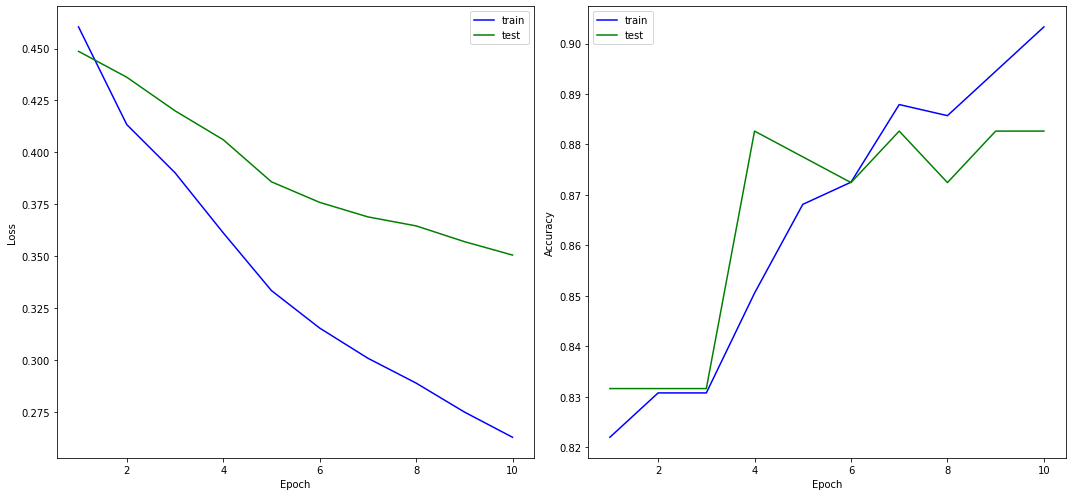

In [ ]:
loss_aacc(len(history1.history['binary_accuracy']), history1)

#### Do predictions

In [ ]:
y_pred= model.predict(val_data_gen(df_test, batch))
print('Shape of y_pred:', y_pred.shape)

28/28 [==============================] - 11s 408ms/step
Shape of y_pred: (196, 1)


In [ ]:
# saving the prediction results
y_pred_df = pd.DataFrame()
y_pred_df['Original data'] = pd.DataFrame(y_pred)

#### Evaluate the model performance

Accuracy  |  0.883
Precision |  0.656
Recall    |  0.636
F1 score  |  0.646

Confusion Matrix
[[152.  11.]
 [ 12.  21.]]


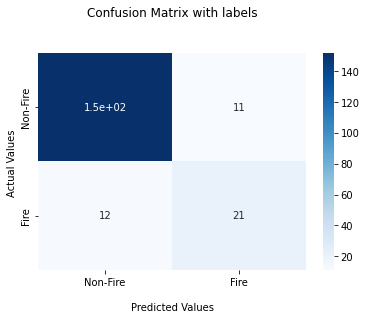

In [ ]:
eval(y_pred, "Original data")

In [ ]:
pd.DataFrame.from_dict(results, orient='columns')

,Original data
Accuracy,0.883
CM,"[[152.0, 11.0], [12.0, 21.0]]"
F1 Score,0.646
Precision,0.656
Recall,0.636


#### Takeway:
Accuracy is 83%, but recall of 0.63 is not very promising. So let's try to improve the recall and accuracy by adopting data balancing and data augmentation techniques.

### Balancing the labels by using resampling

In [ ]:
# Separate majority and minority classes
df_majority = df_train[df_train['label']=='0']
df_minority = df_train[df_train['label']=='1']

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=378,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_train_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Shuffle the combined training data
df_train_upsampled = shuffle(df_train_upsampled)

# Display new class counts
print('Label count in upsampled training data:')
print(df_train_upsampled['label'].value_counts())
df_train_upsampled

Label count in upsampled training data:
1    378
0    378
Name: label, dtype: int64


,folder,filename,label
95,Fire images,house-fire-damage-03.jpg,1
536,Normal Images 5,small-conference1.jpg,0
8,Fire images,FIR_LKC_ART_01_Detectingfire_bedroomfire.jpg,1
13,Normal Images 1,36701_133427340015458_133421316682727_259449_2...,0
47,Fire images,image_update_img.jpg,1
...,...,...,...
38,Fire images,10-9-15-2-400.jpg,1
26,Fire images,dsc7056.jpg,1
323,Normal Images 3,house-with-lights-on.jpg,0
20,Fire images,90420_Ritter_Fire_A_031.jpg,1


#### Now that data is balanced, lets fit the model on balanced data and  do prediction.

In [ ]:
batch = 7
epoch = 20

#initializing the model weights
model.set_weights(initial_weight_values)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

data = tf.data.Dataset.from_generator(lambda: data_gen(df = df_train_upsampled, batch_size = batch), 
                                              output_types = (tf.float32, tf.float32))

history2 = model.fit(data , steps_per_epoch=len(df_train_upsampled) // batch, epochs=epoch, 
                     validation_data= data_gen(df_test, batch_size=batch), 
                     validation_steps= len(df_test) // batch,
                     callbacks=[callback])

Epoch 1/20
108/108 [==============================] - 82s 746ms/step - loss: 0.6132 - binary_accuracy: 0.6997 - val_loss: 0.5260 - val_binary_accuracy: 0.8163
Epoch 2/20
108/108 [==============================] - 77s 712ms/step - loss: 0.5054 - binary_accuracy: 0.7606 - val_loss: 0.4839 - val_binary_accuracy: 0.8214
Epoch 3/20
108/108 [==============================] - 75s 695ms/step - loss: 0.4448 - binary_accuracy: 0.7844 - val_loss: 0.4605 - val_binary_accuracy: 0.8214
Epoch 4/20
108/108 [==============================] - 73s 674ms/step - loss: 0.3978 - binary_accuracy: 0.8069 - val_loss: 0.4380 - val_binary_accuracy: 0.8265
Epoch 5/20
108/108 [==============================] - 73s 675ms/step - loss: 0.3609 - binary_accuracy: 0.8241 - val_loss: 0.4215 - val_binary_accuracy: 0.8265
Epoch 6/20
108/108 [==============================] - 79s 734ms/step - loss: 0.3260 - binary_accuracy: 0.8505 - val_loss: 0.3888 - val_binary_accuracy: 0.8571
Epoch 7/20
108/108 [==========================

 ### Visualize the training vs test loss and accuracy plot.

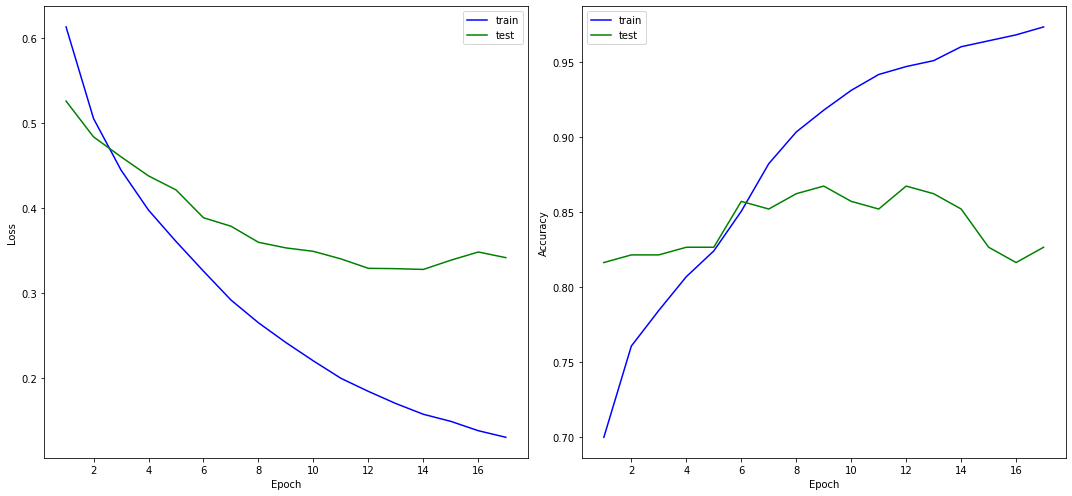

In [ ]:
loss_aacc(len(history2.history['binary_accuracy']), history2)

In [ ]:
#loss_aacc(len(history2.history['accuracy']), history2)
y_pred2= model.predict(val_data_gen(df_test, batch))
print('Shape of y_pred:', y_pred.shape)

28/28 [==============================] - 14s 530ms/step
Shape of y_pred: (196, 1)


In [ ]:
# saving the prediction results
y_pred_df['Upsampled data'] = pd.DataFrame(y_pred2)

#### Evaluate the model performance

Accuracy  |  0.827
Precision |  0.491
Recall    |  0.848
F1 score  |  0.622

Confusion Matrix
[[134.  29.]
 [  5.  28.]]


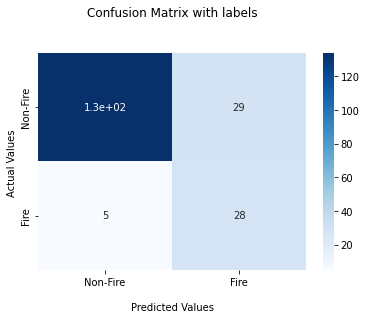

In [ ]:
eval(y_pred2, 'Upsampled data')

In [ ]:
pd.DataFrame.from_dict(results, orient='columns')

,Original data,Upsampled data
Accuracy,0.883,0.827
Precision,0.656,0.491
Recall,0.636,0.848
F1 Score,0.646,0.622
CM,"[[152.0, 11.0], [12.0, 21.0]]","[[134.0, 29.0], [5.0, 28.0]]"


#### Takeway:
With accuracy of 82% recall has now increased to 0.84 from 0.63 while on the other hand precision has decreased from 0.65 to 0.491. Nowlet's try to improve model performance by adding more training data using data augmentation.

In [ ]:
data_path

'/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/'

### Performing image augmentation by adding 60 degree rotated images, verticaly and horizontaly flipped image in the training data. 

In [ ]:
#Creating empty folder inside data folder to store augmented images.

#it will store the verticaly flipped images
if path.exists('/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Vertical flip') == False:
  os.mkdir('/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Vertical flip')

#it will store the horizontaly flipped images
if path.exists('/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Horizontal flip') == False:
  os.mkdir('/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Horizontal flip')

#it will store the rotated images
if path.exists('/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Rotated') == False:
  os.mkdir('/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset/Rotated')


In [ ]:
aug = '/content/gdrive/My Drive/Fire_BinaryClassifier/Fire-Detection-Image-Dataset'
f, axarr = plt.subplots(2,4, figsize=(12,9))
axarr[0,0].imshow(plt.imread(aug+'/Fire images/13518571.jpg'))
axarr[0,0].title.set_text('Original Fire image')
axarr[0,1].imshow(plt.imread(aug+'/Vertical Flip/13518571.jpg'))
axarr[0,1].title.set_text('Vertically flipped')
axarr[0,2].imshow(plt.imread(aug+'/Horizontal Flip/13518571.jpg'))
axarr[0,2].title.set_text('Horizontally flipped')
axarr[0,3].imshow(plt.imread(aug+'/Rotated/13518571.jpg'))
axarr[0,3].title.set_text('Rotated to 120 deg.')
axarr[1,0].imshow(plt.imread(aug+'/Normal images 1/1444.jpg'))
axarr[1,0].title.set_text('Original Normal image')
axarr[1,1].imshow(plt.imread(aug+'/Vertical Flip/1444.jpg'))
axarr[1,1].title.set_text('Vertically flipped')
axarr[1,2].imshow(plt.imread(aug+'Horizontal Flip/1444.jpg'))
axarr[1,2].title.set_text('Horizontally flipped')
axarr[1,3].imshow(plt.imread(aug+'/Rotated/1444.jpg'))
axarr[1,3].title.set_text('Rotated to 120 deg.')

In [ ]:
#create an empty dataframe to store augmented image details.
df_aug = pd.DataFrame(columns=['filename', 'label', 'folder'])

for m, k, p in zip(df_train_upsampled['filename'].values, df_train_upsampled['label'].values, df_train_upsampled['folder'].values):
    # Load the original image
    org_img = Image.open('{}{}/{}'.format(data_path, p, m))
    #print(m)

    # Flip the original image verticaly
    vert_img = org_img.transpose(method=Image.FLIP_TOP_BOTTOM)
    vert_img.save('{}{}/{}'.format(data_path, 'Vertical flip', m))
    df_aug.loc[len(df_aug)] = [m, k, 'Vertical flip']

    # Flip the original image horizontaly
    horz_img = org_img.transpose(method=Image.FLIP_LEFT_RIGHT)
    horz_img.save('{}{}/{}'.format(data_path, 'Horizontal flip', m))
    df_aug.loc[len(df_aug)] = [m, k, 'Horizontal flip']

    #Rotate the original image by 3 different angle
    rotated_image = org_img.rotate(60)
    rotated_image.save('{}{}/{}'.format(data_path, 'Rotated', m))
    
    df_aug.loc[len(df_aug)] = [m, k, 'Rotated']

df_aug.head()

,filename,label,folder
0,house-fire-damage-03.jpg,1,Vertical flip
1,house-fire-damage-03.jpg,1,Horizontal flip
2,house-fire-damage-03.jpg,1,Rotated
3,small-conference1.jpg,0,Vertical flip
4,small-conference1.jpg,0,Horizontal flip


In [ ]:
#Combine both balanced training data and augemented data.
df_train_aug = pd.concat([df_train_upsampled, df_aug], axis=0)

#Shuffle the combined training data
df_train_aug = shuffle(df_train_aug)

print('Size of augmented training data:', df_train_aug.shape)

Size of augmented training data: (3024, 3)


### Lets fit the model on data that contains augmented images as well as original images and  do prediction.

In [ ]:
batch = 7
epoch = 20
#initializing the model weights
model.set_weights(initial_weight_values)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

data     = tf.data.Dataset.from_generator(lambda: data_gen(df = df_train_aug, batch_size = batch),
                                                  output_types = (tf.float32, tf.float32))

history3 = model.fit(data , steps_per_epoch=len(df_train_aug) // batch, epochs=epoch, 
                     validation_data= data_gen(df_test, batch_size=batch), 
                     validation_steps= len(df_test) // batch,
                     callbacks=[callback])

Epoch 1/20
432/432 [==============================] - 256s 587ms/step - loss: 0.5226 - binary_accuracy: 0.7490 - val_loss: 0.5935 - val_binary_accuracy: 0.7143
Epoch 2/20
432/432 [==============================] - 246s 569ms/step - loss: 0.3905 - binary_accuracy: 0.8171 - val_loss: 0.5713 - val_binary_accuracy: 0.6633
Epoch 3/20
432/432 [==============================] - 246s 570ms/step - loss: 0.3355 - binary_accuracy: 0.8509 - val_loss: 0.5438 - val_binary_accuracy: 0.6837
Epoch 4/20
432/432 [==============================] - 237s 550ms/step - loss: 0.2973 - binary_accuracy: 0.8733 - val_loss: 0.5251 - val_binary_accuracy: 0.6939
Epoch 5/20
432/432 [==============================] - 236s 547ms/step - loss: 0.2651 - binary_accuracy: 0.8935 - val_loss: 0.5277 - val_binary_accuracy: 0.6786
Epoch 6/20
432/432 [==============================] - 244s 566ms/step - loss: 0.2348 - binary_accuracy: 0.9084 - val_loss: 0.5254 - val_binary_accuracy: 0.7041
Epoch 7/20
432/432 [====================

### Visualize the loss and accuracy of training and validation set.

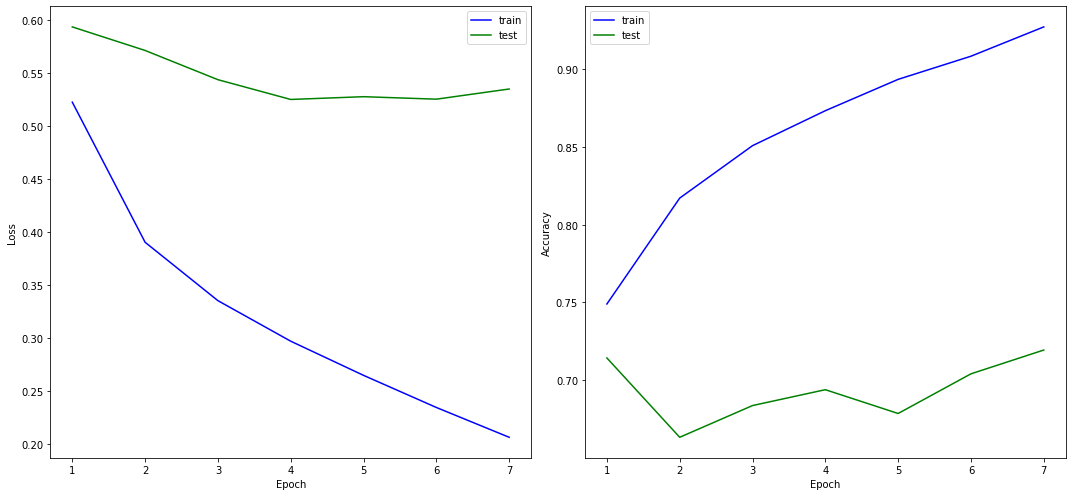

In [ ]:
loss_aacc(len(history3.history['binary_accuracy']), history3)

In [ ]:
y_pred3= model.predict(val_data_gen(df_test, batch))
print('Shape of y_pred:', y_pred3.shape)

28/28 [==============================] - 11s 405ms/step
Shape of y_pred: (196, 1)


In [ ]:
# saving the prediction results
y_pred_df['Aug_Upsampled data'] = pd.DataFrame(y_pred3)
pd.DataFrame(y_pred_df).to_csv(data_path+'prediction_results.csv', index=False)

Accuracy  |  0.719
Precision |  0.375
Recall    |  1.0
F1 score  |  0.545

Confusion Matrix
[[108.  55.]
 [  0.  33.]]


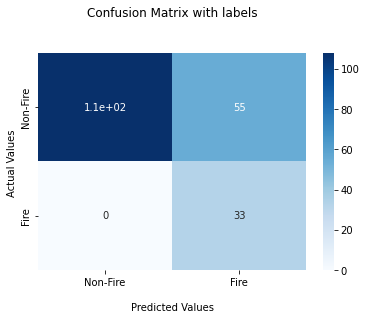

In [ ]:
eval(y_pred3, 'Augmented+Upsampled data')

In [ ]:
pd.DataFrame.from_dict(results, orient='columns')

,Original data,Upsampled data,Augmented+Upsampled data
Accuracy,0.883,0.827,0.719
Precision,0.656,0.491,0.375
Recall,0.636,0.848,1.0
F1 Score,0.646,0.622,0.545
CM,"[[152.0, 11.0], [12.0, 21.0]]","[[134.0, 29.0], [5.0, 28.0]]","[[108.0, 55.0], [0.0, 33.0]]"


#### Takeway:
Despite the fact that the recall is now 1.0, Model performance has deteriorated in comparison to previous results, with an accuracy of 0.719. It appears that the model still requires some fine-tuning to perform optimally. Let's use Kera's tuner to implement hyper parameter tuning.

### Hyper Parameter Tunning

- Install and import keras tuner
- Tune the rate of decay in dropout layer

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 21.4 MB/s 
     |████████████████████████████████| 1.6 MB 35.6 MB/s 


In [ ]:
import keras_tuner as kt

### Create a model hyper-parameter for dropout rate.

In [ ]:
def model_builder(hp):

    # Tune the rate of dropout
    hp_dropout_rate = hp.Choice('dropout_rate', values=[0.0, 0.1, 0.2, 0.3])
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(1024, 1024, 3), use_bias=True),
            tf.keras.layers.MaxPooling2D((2, 2)),

            tf.keras.layers.Conv2D(32, (3,3), activation='relu', use_bias=True),
            tf.keras.layers.MaxPooling2D((2, 2)),
        
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', use_bias=True),
            tf.keras.layers.MaxPooling2D((2, 2)),
            
            
            tf.keras.layers.Dropout(rate = hp_dropout_rate),
        
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', use_bias=True),
            tf.keras.layers.MaxPooling2D((2, 2)),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
        ]
    )
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
    return model   

In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_binary_accuracy', # objective to optimize
                     max_epochs=10, overwrite=True,
                     project_name='Classifier_hyperband') 

# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 1
dropout_rate (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.1, 0.2, 0.3], 'ordered': True}


### Perform hypertuning

In [ ]:

batch = 7
epoch = 10


data = tf.data.Dataset.from_generator(lambda: data_gen(df = df_train_aug, batch_size = batch), 
                                              output_types = (tf.float32, tf.float32))

tuner.search(data, steps_per_epoch=len(df_train_aug) // batch, epochs=epoch, 
             validation_data= data_gen(df_test, batch_size=batch), 
             validation_steps= (len(df_test) // batch))

Trial 4 Complete [00h 08m 01s]
val_binary_accuracy: 0.7346938848495483

Best val_binary_accuracy So Far: 0.8010203838348389
Total elapsed time: 00h 32m 15s


In [ ]:
tuner.get_best_hyperparameters()[0]

In [ ]:
# get the best tuned parameter.
best_hp=tuner.get_best_hyperparameters()[0]
best_hp.values

{'dropout_rate': 0.0,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

### Lets fit the model with the optimal hyperparameters

In [ ]:

h_model = tuner.hypermodel.build(best_hp)
h_model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

data = tf.data.Dataset.from_generator(lambda: data_gen(df = df_train_aug, batch_size = batch), 
                                              output_types = (tf.float32, tf.float32))

history4 = h_model.fit(data , steps_per_epoch=len(df_train_aug) // batch, epochs=epoch, 
                       validation_data= data_gen(df_test, batch_size=batch), 
                       validation_steps= len(df_test) // batch, verbose=1,
                       callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 1022, 1022, 32)    896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 511, 511, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 509, 509, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 254, 254, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 126, 126, 64)    

#### Visualizing the loss and accuracy of training an validation set

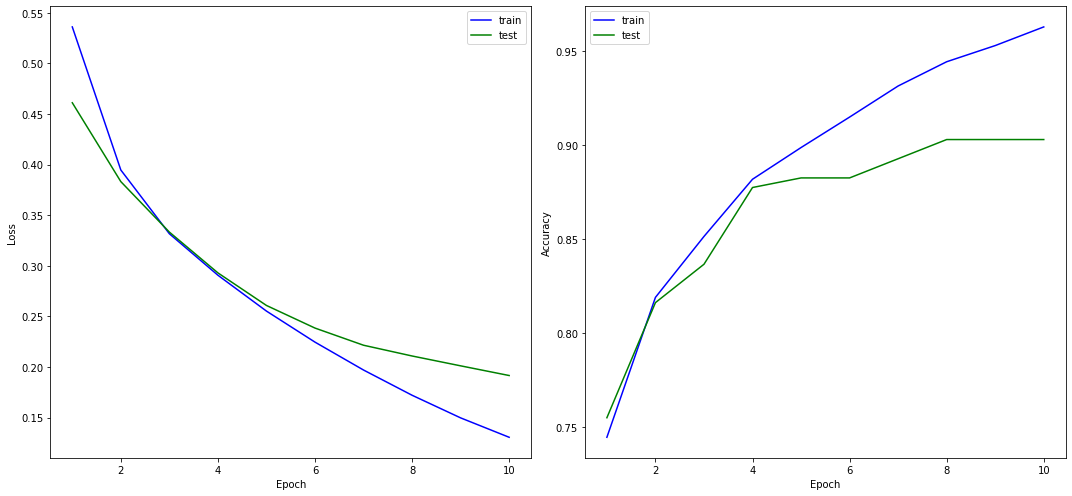

In [ ]:
loss_aacc(len(history4.history['binary_accuracy']), history4)

In [ ]:
y_pred4= h_model.predict(val_data_gen(df_test, batch))
print('Shape of y_pred:', y_pred4.shape)

28/28 [==============================] - 11s 402ms/step
Shape of y_pred: (196, 1)


In [ ]:
# saving the prediction results
y_pred_df['H.P tunning'] = pd.DataFrame(y_pred4)
pd.DataFrame(y_pred_df).to_csv(data_path+'prediction_results.csv', index=False)

### Evaluate model performace

Accuracy  |  0.903
Precision |  0.667
Recall    |  0.848
F1 score  |  0.747

Confusion Matrix
[[149.  14.]
 [  5.  28.]]


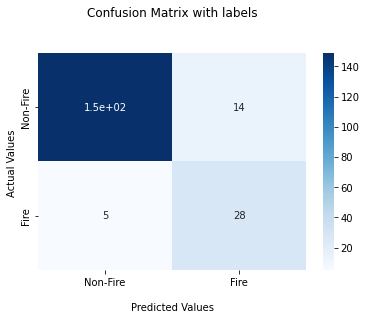

In [ ]:
eval(y_pred4, 'Hyper Tunned model')

In [ ]:
pd.DataFrame.from_dict(results, orient='columns')

,Original data,Upsampled data,Augmented+Upsampled data,Hyper Tunned model
Accuracy,0.883,0.827,0.719,0.903
Precision,0.656,0.491,0.375,0.667
Recall,0.636,0.848,1.0,0.848
F1 Score,0.646,0.622,0.545,0.747
CM,"[[152.0, 11.0], [12.0, 21.0]]","[[134.0, 29.0], [5.0, 28.0]]","[[108.0, 55.0], [0.0, 33.0]]","[[149.0, 14.0], [5.0, 28.0]]"


#### Takeway:
The model performs best after tuning the CNN's drop-out layer. With a maximum accuracy of 0.903, a recall of 0.848, a precision of 0.667, and an F1 score of 0.747.

#### References



*   https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy
*   https://www.tensorflow.org/api_docs/python/tf/data/Dataset
*   https://github.com/keras-team/keras/issues/7506#issuecomment-322050382
*   https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/
* https://www.tensorflow.org/tutorials/keras/keras_tuner


